In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [82]:
# 크롤링할 웹 사이트 정보
base_url = 'https://news.naver.com/'
seoul_url = 'main/main.nhn?mode=LSD&mid=shm&sid1=101#&date=%2000:00:00&page='
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}

In [83]:
def scrap(url, first, key, value):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    lists = soup.findAll(first, {key : value}) 

    return lists

In [101]:

title_list = []
time_list = []
url_list = []

for i in range(20):
    scrap(base_url+seoul_url+str(i), 'div', 'class', 'cluster_text')
    
    for item in lists:
        hrefs = item.find('a')
        title = hrefs.text
        url = hrefs.get('href')
        list1 = scrap(url, 'div', 'class', "sponsor")
        times = [i.find('span').text for i in list1]
        title_list.append(title)
        time_list.append(times[0])
        url_list.append(url)
    
    
# print(title_list)
df = pd.DataFrame(data={'date':time_list, 'title':title_list, 'url':url_list})
df

,date,title,url
0,2020.07.21. 오후 2:39,"이재용-정의선, 2차 회동서 자율주행·수소전기차 함께 탔다",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020.07.21. 오후 2:41,"이재용·정의선, 현대차 안방에서 2차회동…차세대 모빌리티 협력 [종합]",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020.07.21. 오후 3:28,삼성·현대차그룹 손잡고 '차세대 모빌리티' 키운다,https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020.07.21. 오후 3:10,"이재용-정의선, 자율주행·수소전기차 타고 미래車 협력",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020.07.21. 오후 2:47,"[속보] 포스코, 2분기 사상 첫 분기 적자",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...
435,2020.07.21. 오후 3:01,"하나은행, '라임펀드 계약취소' 답변기한 연장 요청…타 금융사들은(종합)",https://news.naver.com/main/read.nhn?mode=LSD&...
436,2020.07.20. 오후 12:51,[오디오래빗] 코로나 막는 내 몸속 #항체 영어로 뭐게?,https://news.naver.com/main/read.nhn?mode=LSD&...
437,2020.07.15. 오후 2:14,[오디오래빗] 부동산 규제하면 다른 곳이 꿈틀 #풍선효과,https://news.naver.com/main/read.nhn?mode=LSD&...
438,2020.07.13. 오후 2:31,[오디오래빗] 내 집 마련 '영끌'해서 산다 #청무피사,https://news.naver.com/main/read.nhn?mode=LSD&...


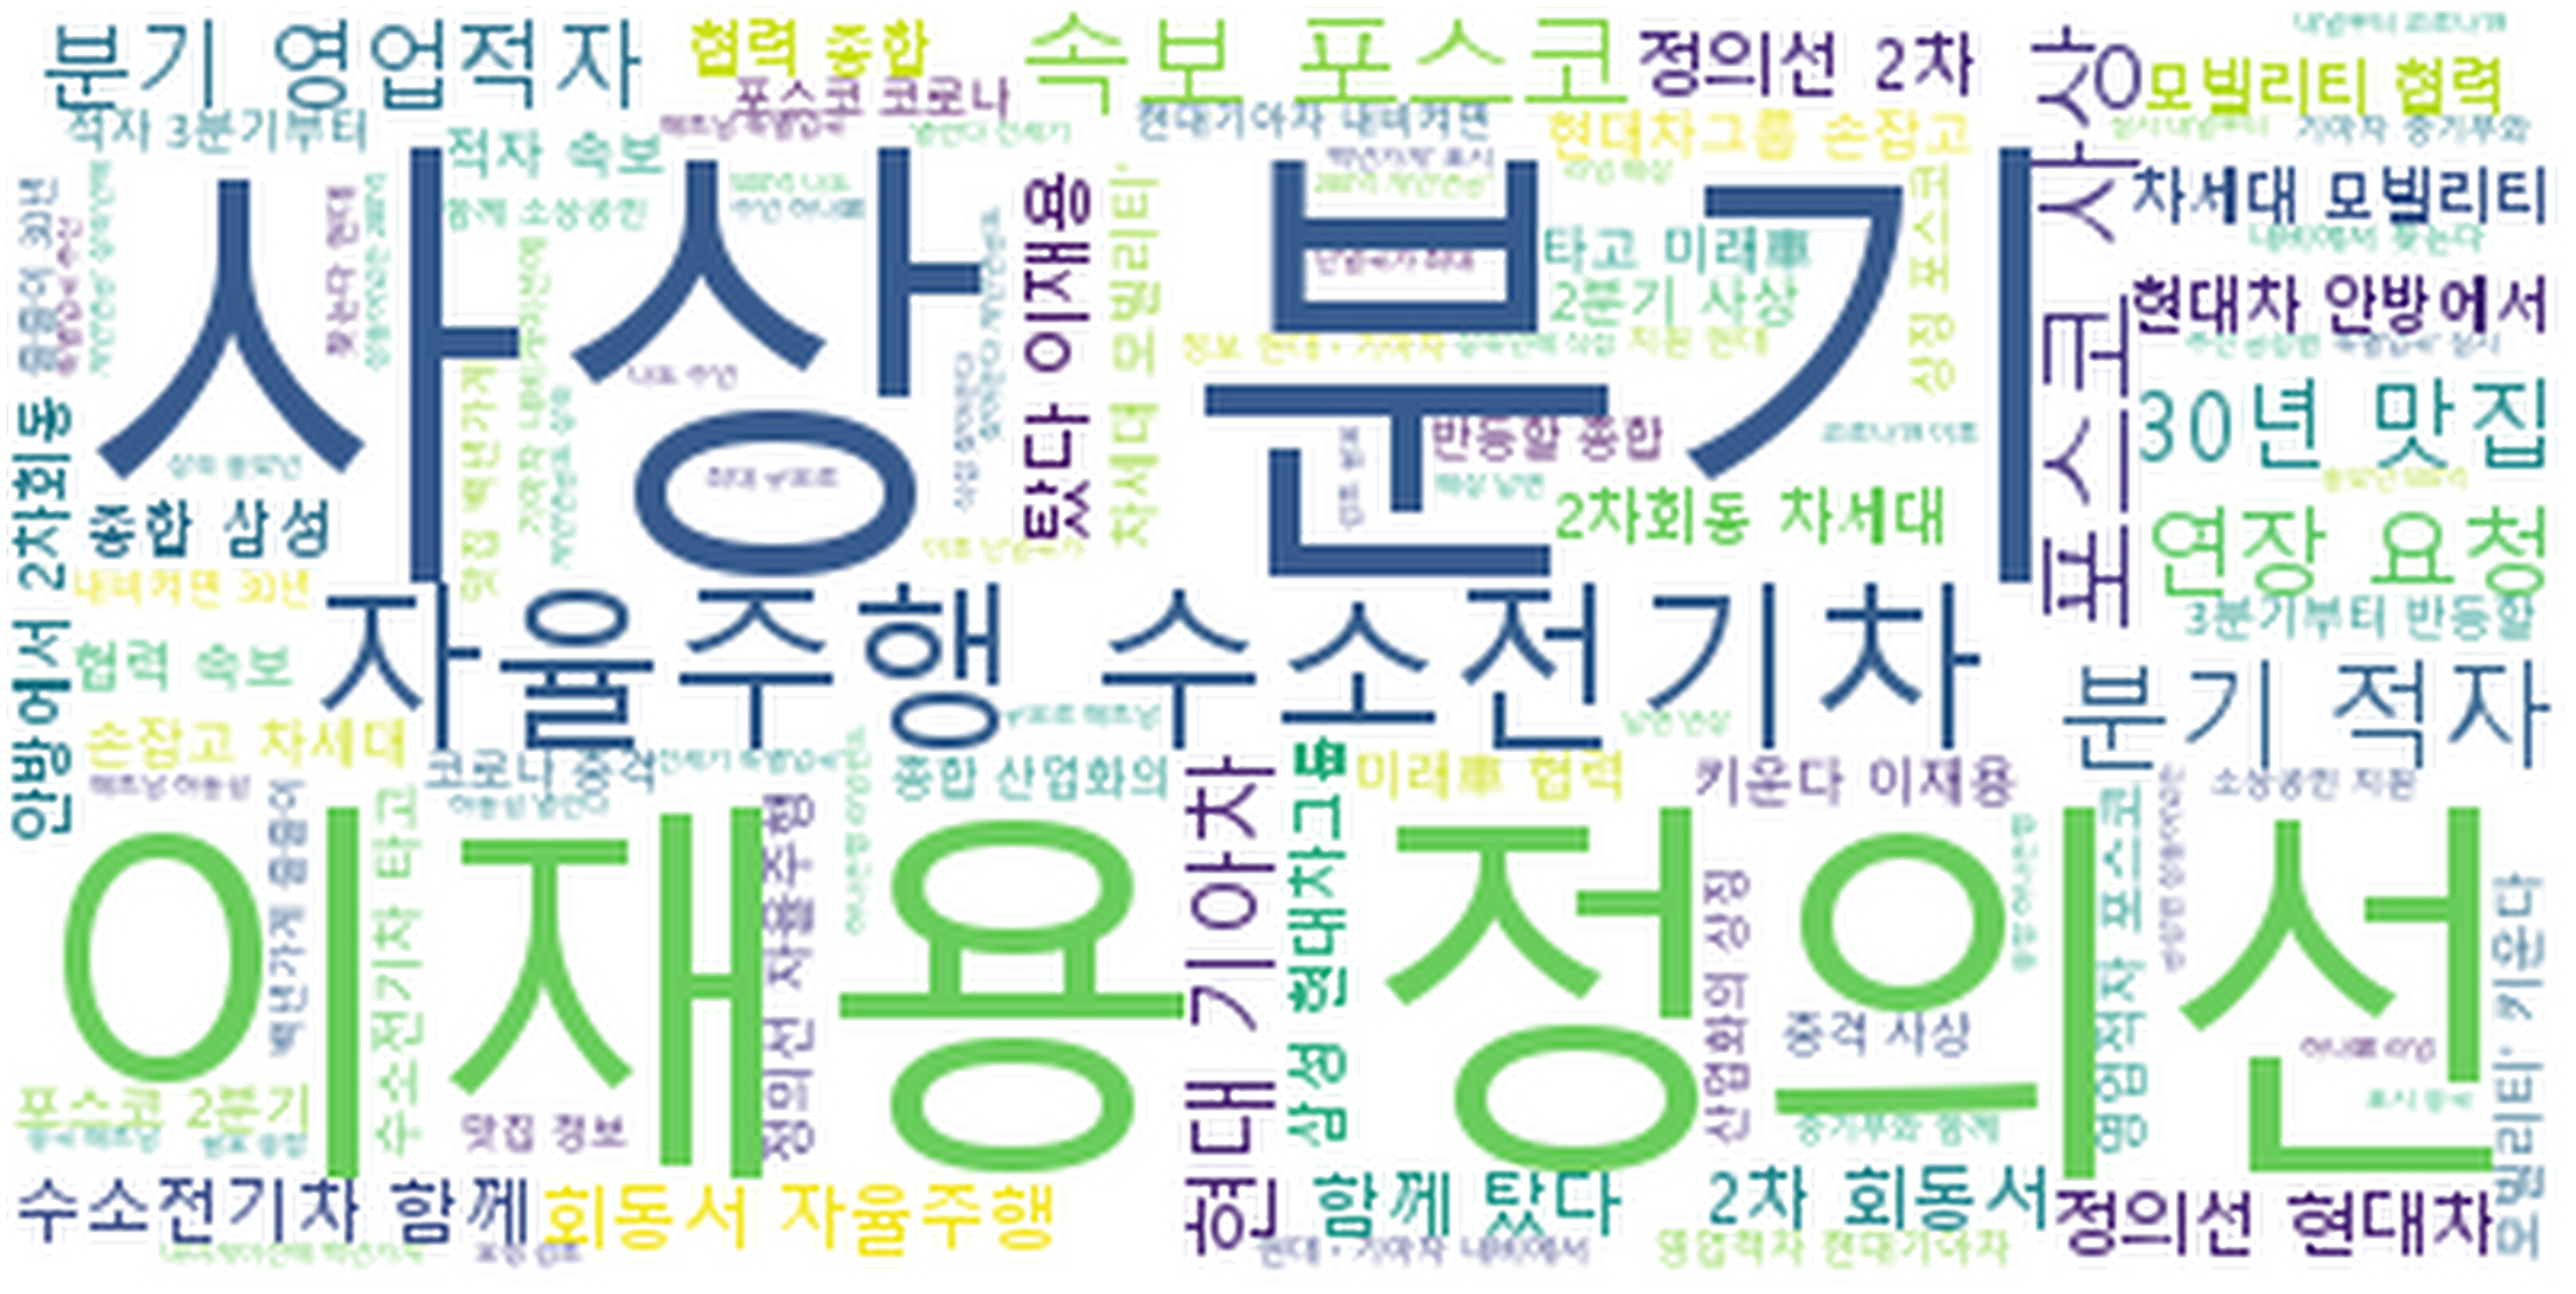

In [114]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

text = df.title.map(lambda x : x+' ').values.sum()

wordcloud = WordCloud(font_path='font/malgun.ttf', background_color='white').generate(text)
plt.figure(figsize=(50,50)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

